In [1]:
# IMPORTNG THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('twitter_train.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [5]:
train=df.copy()

In [6]:
df1=pd.read_csv('twitter_test.csv')

In [7]:
test=df1.copy()

In [8]:
#LET US SEE WHAT ARE THE CLASSICITION 

In [9]:
train['airline_sentiment'].value_counts()

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

In [10]:
#THERE ARE MORE NEAGITVE TWEETS THAN POSITIVE TWEET AND NEUTRAL TWEET

In [11]:
import re
def extract_hastags(doc,hashtags):
    #print(type(doc))
    #print(doc)
    ha=re.findall('#[\w]+',doc)
    for e in ha:
        hashtags.append(e)


In [12]:
#GET THE HASHES
positive_hashtags=train['text'][train['airline_sentiment']=='positive']

In [13]:
positive_hashtags

1        @SouthwestAir seeing your workers time in and ...
2        @united Flew ORD to Miami and back and  had gr...
7        @JetBlue That'd be nice! Hoping to rack up eno...
9        @SouthwestAir yeah haha. Never been in one. It...
12       @USAirways - love the changes in the lounge - ...
                               ...                        
10937    @united kind of cool to run into your boss man...
10950    @JetBlue Even though this flight #226 didn't h...
10969            @SouthwestAir thank you! ❤️❤️❤️ you guys!
10974    @SouthwestAir beautiful view flying into San J...
10976    @united thanks for the help. Wish the phone re...
Name: text, Length: 1802, dtype: object

In [14]:
poshashtags=[]
for e,v in positive_hashtags.iteritems():
    extract_hastags(v,poshashtags)
print(poshashtags)
    

['#destinationdragons', '#United', '#businessFirst', '#3', '#southwestairlines', '#stellarservice', '#thanks', '#DestinationDragons', '#DestinationDragons', '#kudos', '#HollyMais', '#guiltypleasures', '#professional', '#thankful', '#feelingtheluv', '#DestinationDragons', '#excellent', '#330', '#success', '#Passbook', '#22', '#DestinationDragons', '#Mumbai', '#Surat', '#NaviMumbai', '#DestinationDragons', '#ripme', '#customerservice', '#jetblue', '#trueblue', '#greatcustomerservice', '#bringbacktheluvtordu', '#miami', '#directflights', '#CheapFlights', '#FareCompare', '#military', '#StLouis', '#sna2ord', '#1644', '#DestinationDragons', '#FriendlyFriday', '#legroom', '#FirstClass', '#London', '#LondonFashionWeek', '#LFW15', '#Atlantic', '#lovejetblue', '#AmericanAirlines', '#ShoutOut', '#RockStar', '#PromoteThatGirl', '#tbt', '#GrandCanyon', '#Arizona', '#Wow', '#Love', '#Photography', '#TT', '#T5', '#lovejetBlue', '#85832', '#MoodlitMonday', '#gogo', '#dietcoke', '#happyflier', '#3397',

Text(0.5, 1.0, 'WordCloud - Positive Reviews')

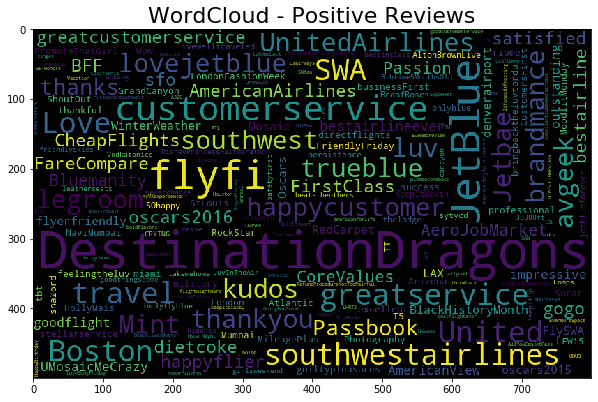

In [15]:

from wordcloud import WordCloud
yess=' '.join([word for word in poshashtags])
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(yess)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Positive Reviews", fontsize = 22)

In [16]:
#NEAGTIVE HASHTAGS
negative_hashtags=train['text'][train['airline_sentiment']=='negative']

In [17]:
negativehashtags=[]
for e,v in negative_hashtags.iteritems():
    extract_hastags(v,negativehashtags)
print(negativehashtags[0:200])

['#incompetent', '#genious', '#yousuck', '#flyunited', '#TeamUSA', '#AmericanAirlines', '#usairways', '#poorservice', '#notgoodenough', '#smugsmirk', '#norush', '#FRUSTRATED', '#LivePersonPlease', '#nogate', '#fail', '#worstairlineever', '#Philadelphia', '#1531', '#BusinessTravel', '#goodenoughmother', '#schedule', '#timezones', '#accuratetraveltimes', '#3rdtimethishashappened', '#SWA', '#Cancelled', '#nocustomerservice', '#americanairlines', '#FAIL', '#connection', '#massivefail', '#failphone', '#fail', '#unitedairline', '#MD80', '#faail', '#mci', '#jetblue', '#unfriendlyskies', '#1589', '#fail', '#nolove', '#cali', '#youareonyourown', '#nonewplanes', '#old', '#shame', '#FAILINGYOURCUSTOMER', '#USAirways', '#Cancelled', '#Missed', '#Promised', '#lostrevenue', '#angryandsober', '#bachelorpartymishap', '#PHL', '#neptune', '#waivethefee', '#unscheduled', '#REFUND', '#wastedtime', '#no2jetblue', '#nola', '#fail', '#epicfailunited', '#whatajoke', '#help', '#EWR', '#YOW', '#wedontcarebecaus

Text(0.5, 1.0, 'WordCloud - Negative hashtags')

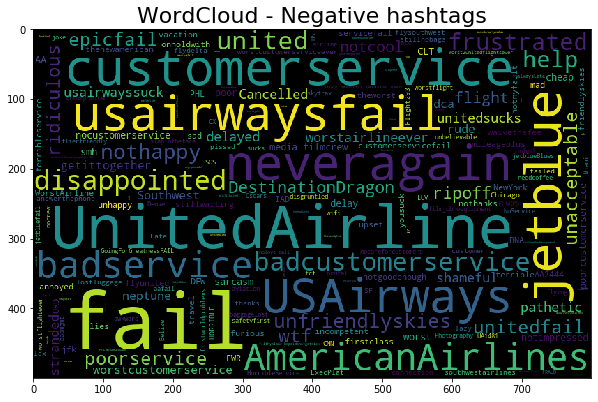

In [18]:
no=' '.join([word for word in negativehashtags])
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(no)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Negative hashtags", fontsize = 22)

In [19]:
from nltk.corpus import stopwords
import string
from nltk import pos_tag

In [20]:
# LET US CREATE THE STOPWORDS HERE
stopp=stopwords.words('english')

In [21]:
#stopp

In [22]:
punc=string.punctuation

In [23]:
stopp=set(stopp)

In [24]:
stopp.update(punc)

In [25]:
len(stopp)

211

In [26]:
#LET US GET STOPWORDS FROM INTERNET
newstops=["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]
stopp.update(newstops)


In [27]:
len(stopp)

241

In [28]:
# THERE ARE 241 STOPWORDS IN THIS 

In [29]:
# DO ONE THING NOW GET ALL THE TEXT FROM THE TWEETS
def get_all_the_text(strr):
    #NOW WHAT YOU DO IS REPLACE @by SPCAE
    strr=str(strr)
    strr=re.sub('@[\w]+','',strr)
    strr=strr.strip()
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    strr=emoji_pattern.sub(r'', strr)
    return strr.strip()

In [30]:
alltext=train['text']

In [31]:
alltext

0        @SouthwestAir I am scheduled for the morning, ...
1        @SouthwestAir seeing your workers time in and ...
2        @united Flew ORD to Miami and back and  had gr...
3           @SouthwestAir @dultch97 that's horse radish 😤🐴
4        @united so our flight into ORD was delayed bec...
                               ...                        
10975                              @AmericanAir followback
10976    @united thanks for the help. Wish the phone re...
10977    @usairways the. Worst. Ever. #dca #customerser...
10978    @nrhodes85: look! Another apology. DO NOT FLY ...
10979    @united you are by far the worst airline. 4 pl...
Name: text, Length: 10980, dtype: object

In [32]:
allintext=[]
for e,v in alltext.iteritems():
    newstr=get_all_the_text(v)
    allintext.append(newstr)   

In [33]:
allintext[0:5]

['I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
 'seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
 'Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
 "that's horse radish",
 'so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.']

In [34]:
#NOW YOU GOT EVERYTHING IN TERMS OF TEXT

In [35]:
#NOW REMOVE ALL STOPWORDS AND APPLY LEMMATIZATION ALSO
#IMPORT ALL THE LIBARARIES IN THIS
from nltk.tokenize import word_tokenize

In [36]:
all_words_to=[word_tokenize(doc) for doc in allintext]

In [37]:
#all_words_to[0:5]
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [38]:
def get_simple_tage(tag):
    if tag.startswith('J'):
        return wordnet.ADV
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [39]:
def clean_words(word):
    output_words=[]
    # YOU ARE GETTING ONLY THOSE WORDS WHICH ARE IMPORTANT 
    for each in word:
        each=each.strip()
        if each not in stopp:
            if (each.isnumeric() is False) and (len(each)>=2) and  (each!='hour') and  (each!='http') and  (each!="n't") and  (each!="'s") and  (each!='get') and (each!="...") and (each!="''") and (each!="``") and (each!='1/2') and (each!='iah') and (each!='lga') and (each!="..") and (each!='1.5'):
                tagg=pos_tag([each])[0][1]
                getthetag=get_simple_tage(tagg)
                word=lemma.lemmatize(each,pos=getthetag)
                word=word.lower()
                word=word.strip()
                output_words.append(word)
    return output_words
            
            
            
            
    

In [40]:
all_new_cwords=[clean_words(eachw) for eachw in all_words_to]

In [41]:
#all_new_cwords[0]
# NOW YOU ALL THE CLEAN WORDS ADD ALL THOSE WORDS INTO ONE LIST

In [42]:
#'hour' in all_new_cwords #JUST TO CHECK WHETHER IT IS THERE OR NOT

In [43]:
allwordstoselect=[]
for eachlist in all_new_cwords:
    allwordstoselect+=eachlist
    
    

In [44]:
#allwordstoselect[0:200]
len(allwordstoselect)    

101252

In [45]:
# OH MY GOD THE LENGTH IS 113328 WE HAVE TO CHOOSE TOP 3500 WORDS 
from nltk import FreqDist
import nltk
freq=nltk.FreqDist(allwordstoselect)

In [46]:
freq.most_common(3000)
features=[]
k=0
for w in freq.most_common(4000):
    fea=w[0]
    if fea=='hour':
        continue
    if fea!="amp" and fea!="'m" and fea!="'ve" and fea!="u" and fea!="'ll" and fea!="my" and fea!="jfk" and fea!="wo" and fea!="w/" and fea!="--" and fea!="dm":
        features.append(fea)
        k=k+1
    if k==3000:
        break

In [47]:
len(features)

3000

# --------------------------------------------------------------------------------------------------------------

In [48]:
# NOW YOU GOT THE FEATURES OF HOW YOU WANT TO BUILD THE DATASET

In [49]:
train
#NOW LET ME CREATE A TUPLE

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,569934458364813313,neutral,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN
10976,568564006329434113,positive,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)
10977,569643648910028801,negative,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN
10978,568864981917110272,negative,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN


In [50]:
documents=[]
for k,v in train.iterrows():
    sentiment=v['airline_sentiment']
    textt=v['text']
    documents.append((textt,sentiment))
    
    

In [51]:
# NOW YOU GOT THE TEXT AND EVEN YOU GOT THE 
documents[0:3]

[('@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
  'negative'),
 ('@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
  'positive'),
 ('@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
  'positive')]

In [52]:
#test

In [53]:
# NOW YOU BUILD THE FEATURE SET

In [54]:
training_documents=[(get_all_the_text(doc),category) for doc,category in documents]

In [55]:
training_documents[0:5]

[('I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
  'negative'),
 ('seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
  'positive'),
 ('Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
  'positive'),
 ("that's horse radish", 'negative'),
 ('so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.',
  'negative')]

In [56]:
training_documents=[(clean_words(word_tokenize(doc)),category) for doc,category in training_documents]

In [57]:
# NOW LET US DO THE SAME THING FOR THE TEST_DATA AS WELL

In [58]:
tdocuments=[]
for k,v in test.iterrows():
    #sentiment=v['airline_sentiment']
    textt=v['text']
    tdocuments.append((textt))

In [59]:
tdocuments[4]

'@AmericanAir still no response from AA. great job guys!'

In [60]:
testing_documents=[(get_all_the_text(doc)) for doc in tdocuments]

In [61]:
testing_documents[0:5]

["In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?",
 'after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.',
 "can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow.",
 'I can legitimately say that I would have rather driven cross country than flown on US Airways.',
 'still no response from AA. great job guys!']

In [62]:
testing_documents=[(clean_words(word_tokenize(doc))) for doc in testing_documents]

In [63]:
training_documents[0:4]

[(['schedule',
   'morning',
   'day',
   'fact',
   'yes..not',
   'sure',
   'even',
   'flight',
   'one',
   'cancelled',
   'flightled'],
  'negative'),
 (['see',
   'worker',
   'time',
   'time',
   'go',
   'beyond',
   'love',
   'fly',
   'guy',
   'thank'],
  'positive'),
 (['flew',
   'ord',
   'miami',
   'back',
   'great',
   'crew',
   'service',
   'leg',
   'thanks'],
  'positive'),
 (['horse', 'radish'], 'negative')]

In [64]:
testing_documents[0:4]

[['in',
  'car',
  'gng',
  'dfw',
  'pulled',
  '1hr',
  'ago',
  'icy',
  'road',
  'on-hold',
  'aa',
  'since',
  '1hr',
  'ca',
  'reach',
  'arpt',
  'aa2450',
  'wat'],
 ['plane',
  'land',
  'identical',
  'worse',
  'condition',
  'grk',
  'accord',
  'metars'],
 ['ca',
  'believe',
  'many',
  'pay',
  'customer',
  'left',
  'high',
  'dry',
  'reason',
  'flight',
  'cancelled',
  'flightlations',
  'monday',
  'bdl',
  'wow'],
 ['legitimately',
  'say',
  'rather',
  'driven',
  'cross',
  'country',
  'flown',
  'us',
  'airways']]

# ------------------------------------------------------------------------------------------------------------

In [65]:
'hour' in features

False

In [66]:
def get_the_feature(wordss):
    feature_set={}
    wordss=set(wordss)
    for word in features:
        feature_set[word]=word in wordss
    return feature_set

In [67]:
training_data=[(get_the_feature(doc),category) for doc,category in training_documents]

In [68]:
testing_data=[(get_the_feature(doc)) for doc in testing_documents]

# ----------------------------------------------------------------------------------------------------------

In [69]:
from nltk import NaiveBayesClassifier

In [70]:
classifier=NaiveBayesClassifier.train(training_data)

In [71]:
lenght=len(testing_data)

In [72]:
y_pred=[]
for i in range(0,lenght):
    prediction=classifier.classify(testing_data[i])
    y_pred.append(prediction)

In [73]:
y_pred

['negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative'

In [74]:
p=pd.DataFrame(y_pred)

In [75]:
#p.to_csv('twitter3.csv', index = False,header=False)

In [76]:
# THE ACCURACY FOR THE ABOVE IS 77.62 WE HAVE TO DO SOMETHING TO IMPROVE THIS

In [77]:
classifier.show_most_informative_features(15)

Most Informative Features
                   kudos = True           positi : negati =     51.9 : 1.0
                favorite = True           positi : negati =     34.2 : 1.0
               fantastic = True           positi : negati =     34.2 : 1.0
             outstanding = True           positi : negati =     29.1 : 1.0
                 helpful = True           positi : neutra =     25.4 : 1.0
                   flyfi = True           positi : negati =     24.1 : 1.0
                   thank = True           positi : negati =     23.0 : 1.0
                 awesome = True           positi : negati =     22.6 : 1.0
                    hold = True           negati : positi =     22.3 : 1.0
               beautiful = True           positi : negati =     21.5 : 1.0
                      hr = True           negati : positi =     21.4 : 1.0
                  street = True           neutra : negati =     20.6 : 1.0
                   daily = True           neutra : negati =     20.6 : 1.0

In [78]:
from sklearn.svm import SVC

In [79]:
sv=SVC()

In [80]:
from nltk.classify.scikitlearn import SklearnClassifier

In [81]:
#classifier_sklearn=SklearnClassifier(sv)

In [82]:
#classifier_sklearn.train(training_data)

In [83]:
'''
y_pred1=[]
lenght=len(testing_data)
for i in range(0,lenght):
    prediction1=classifier_sklearn.classify(testing_data[i])
    y_pred1.append(prediction1)
'''

'\ny_pred1=[]\nlenght=len(testing_data)\nfor i in range(0,lenght):\n    prediction1=classifier_sklearn.classify(testing_data[i])\n    y_pred1.append(prediction1)\n'

In [84]:
#p1=pd.DataFrame(y_pred1)

In [85]:
#p1.to_csv('twitter4.csv', index = False,header=False)

In [86]:
# THE ACCURACY FOR THE ABOVE IS 77.62 WE HAVE TO DO SOMETHING TO IMPROVE THIS

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
#rv=RandomForestClassifier()

In [89]:
#classifier_sklearn1=SklearnClassifier(rv)

In [90]:
#classifier_sklearn1.train(training_data)

In [91]:
'''
y_pred3=[]
for i in range(0,lenght):
    prediction3=classifier_sklearn1.classify(testing_data[i])
    y_pred3.append(prediction3)
'''

'\ny_pred3=[]\nfor i in range(0,lenght):\n    prediction3=classifier_sklearn1.classify(testing_data[i])\n    y_pred3.append(prediction3)\n'

In [92]:
#p2=pd.DataFrame(y_pred3)

In [93]:
#p2.to_csv('twitter5.csv', index = False,header=False)

In [94]:
#THIS IS GIVING 76.26 ACCURACY 

In [95]:
#LET US USE COUNT VECTORIZER AND TFIDF VECTORIZER TO GET GOOD VALUES IN ACCURACY

In [96]:
#training_data[0:2]

In [97]:
training_documents[0:3]

[(['schedule',
   'morning',
   'day',
   'fact',
   'yes..not',
   'sure',
   'even',
   'flight',
   'one',
   'cancelled',
   'flightled'],
  'negative'),
 (['see',
   'worker',
   'time',
   'time',
   'go',
   'beyond',
   'love',
   'fly',
   'guy',
   'thank'],
  'positive'),
 (['flew',
   'ord',
   'miami',
   'back',
   'great',
   'crew',
   'service',
   'leg',
   'thanks'],
  'positive')]

In [98]:
testing_documents[0:3]

[['in',
  'car',
  'gng',
  'dfw',
  'pulled',
  '1hr',
  'ago',
  'icy',
  'road',
  'on-hold',
  'aa',
  'since',
  '1hr',
  'ca',
  'reach',
  'arpt',
  'aa2450',
  'wat'],
 ['plane',
  'land',
  'identical',
  'worse',
  'condition',
  'grk',
  'accord',
  'metars'],
 ['ca',
  'believe',
  'many',
  'pay',
  'customer',
  'left',
  'high',
  'dry',
  'reason',
  'flight',
  'cancelled',
  'flightlations',
  'monday',
  'bdl',
  'wow']]

In [99]:
categories=[categ for doc,categ in training_documents]

In [100]:
categories[0:5]

['negative', 'positive', 'positive', 'negative', 'negative']

In [101]:
# GET THE DATA FROM TRAINING DOCUMENTS

In [102]:
text_documents=[' '.join(doc) for doc,category in training_documents]

In [103]:
text_documents[0:3]

['schedule morning day fact yes..not sure even flight one cancelled flightled',
 'see worker time time go beyond love fly guy thank',
 'flew ord miami back great crew service leg thanks']

In [104]:
test_text_documents=[' '.join(doc) for doc in testing_documents]

In [105]:
test_text_documents[0:4]

['in car gng dfw pulled 1hr ago icy road on-hold aa since 1hr ca reach arpt aa2450 wat',
 'plane land identical worse condition grk accord metars',
 'ca believe many pay customer left high dry reason flight cancelled flightlations monday bdl wow',
 'legitimately say rather driven cross country flown us airways']

In [106]:
# NOW WE HAVE GOT THE DATA WHICH WE HAVE TO GET NOW WE WILL DO COUNTVECTORIZER

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
cv=CountVectorizer(max_features=3000, max_df=0.8, min_df=0.001)

In [109]:
x_train_feature1=cv.fit_transform(text_documents)

In [110]:
x_train_feature1.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
x_train_feature1.shape

(10980, 1279)

In [112]:
x_test_features1=cv.transform(test_text_documents)

In [113]:
y_train=categories
#x_test_features.shape

In [114]:
x_test_features1.shape

(3660, 1279)

In [115]:
clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_feature1, y_train)
y_test1=clf1.predict(x_test_features1)

In [116]:
p5=pd.DataFrame(y_test1)

In [117]:
p5

,0
0,negative
1,negative
2,negative
3,negative
4,negative
...,...
3655,negative
3656,negative
3657,neutral
3658,positive


In [118]:
p5.to_csv('twitter6.csv', index = False,header=False)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)

In [121]:
x_train_feature2=count_vect.fit_transform(text_documents)

In [122]:
x_train_feature2.shape

(10980, 1279)

In [123]:
x_test_features2=count_vect.transform(test_text_documents)

In [124]:
x_test_features2.shape

(3660, 1279)

In [130]:
clf3=RandomForestClassifier(n_estimators=2000,n_jobs=-1)
clf3.fit(x_train_feature2, y_train)
y_test3=clf3.predict(x_test_features2)

In [131]:
y_test3[0:10]

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'neutral', 'negative', 'negative', 'negative'],
      dtype='<U8')

In [132]:
p7=pd.DataFrame(y_test3)

In [133]:
p7.to_csv('twitter9.csv', index = False,header=False)

In [134]:
from sklearn.svm import SVC

In [135]:
sv=SVC()

In [136]:
sv.fit(x_train_feature2, y_train)

SVC()

In [137]:
y_test4=sv.predict(x_test_features2)

In [138]:
y_test4[0:10]

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'neutral', 'negative', 'negative', 'negative'],
      dtype='<U8')

In [139]:
p8=pd.DataFrame(y_test4)

In [140]:
p8.to_csv('twitter10.csv', index = False,header=False)

In [142]:
#JUST TRY OUT GRID SEARCH CV
from sklearn.model_selection import GridSearchCV

In [143]:
clf10=SVC()
grid={'C':[1e2,1e3,5e3,1e4,5e4,1e5],'gamma':[1e-3,5e-4,1e-4,5e-3]}
abc=GridSearchCV(clf10,grid,n_jobs=-1)
abc.fit(x_train_feature2, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [144]:
abc.best_estimator_

SVC(C=100.0, gamma=0.005)

In [146]:
svf=SVC(C=100.0,gamma=0.005)

In [147]:
svf.fit(x_train_feature2, y_train)

SVC(C=100.0, gamma=0.005)

In [148]:
y_test5=svf.predict(x_test_features2)

In [149]:
y_test5[0:10]

array(['negative', 'neutral', 'negative', 'negative', 'positive',
       'neutral', 'neutral', 'negative', 'negative', 'negative'],
      dtype='<U8')

In [150]:
p9=pd.DataFrame(y_test5)

In [151]:
p9.to_csv('twitter11.csv', index = False,header=False)

In [152]:
# HERE WE GOT AN WHOOPING OF 78.44 ACCURACY IT IS PRETTY GOOD 